# Iris dataset
2 attributes

In [36]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Read data
iris = datasets.load_iris()

# 2 Attributes
X = iris.data[:, 2:4]
y = iris.target

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Model building

In [38]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),
    tf.keras.layers.Dense(units=16, activation='sigmoid', name='hidden1'),
    tf.keras.layers.Dense(units=3, name='output', activation='softmax')
    ])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 16)                48        
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


# Model training

In [39]:
tf_fit = model.fit(x=X_train_std, y=y_train,
        batch_size=16,
        validation_split=0.1,
        epochs=100, 
        verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 27ms/step - loss: 1.2326 - accuracy: 0.2979 - val_loss: 1.0244 - val_accuracy: 0.6364
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 1.2002 - accuracy: 0.2979 - val_loss: 1.0162 - val_accuracy: 0.6364
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1725 - accuracy: 0.3404 - val_loss: 1.0042 - val_accuracy: 0.7273
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1468 - accuracy: 0.4787 - val_loss: 0.9958 - val_accuracy: 0.7273
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1207 - accuracy: 0.6277 - val_loss: 0.9867 - val_accuracy: 0.7273
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1001 - accuracy: 0.6596 - val_loss: 0.9781 - val_accuracy: 0.7273
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0806 - accuracy: 0.6596 - val_loss: 0.9678 - val_accuracy: 0.7273
Epoch 8/100
6/6 [=========

In [40]:
for key, val in tf_fit.history.items():
    print( f'{key:20s}: {[ f"{i:3.2f}" for i in val[-6:]]}')

loss                : ['0.51', '0.50', '0.50', '0.50', '0.49', '0.49']
accuracy            : ['0.89', '0.90', '0.90', '0.90', '0.90', '0.90']
val_loss            : ['0.40', '0.40', '0.39', '0.39', '0.39', '0.38']
val_accuracy        : ['0.91', '0.91', '0.91', '0.91', '0.91', '0.91']


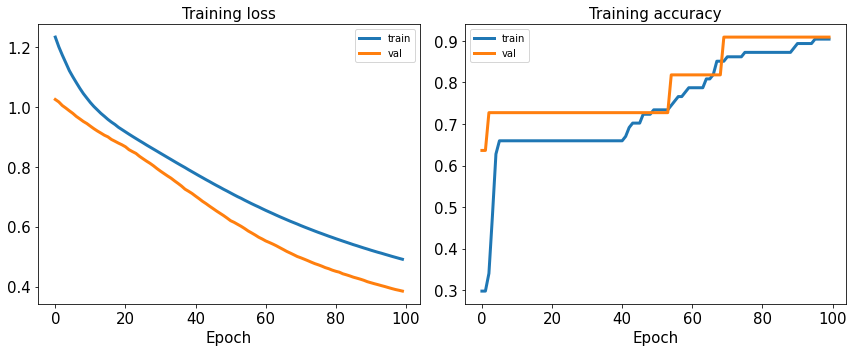

In [41]:
hist = tf_fit.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['train','val'])

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax.legend(['train','val'])

## Model evaluation

In [42]:
results = model.evaluate(X_test_std, y_test, verbose=0)
print(f'Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}')

Test loss: 0.4847   Test Acc.: 0.8889


## Prediction

In [43]:
y_hat = model(X_test_std[:3])
print(y_hat.numpy())

[[0.01516417 0.30543718 0.6793986 ]
 [0.7619554  0.19332662 0.04471803]
 [0.8042238  0.1610783  0.03469787]]


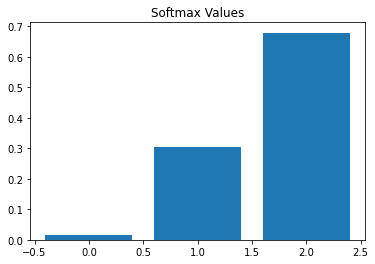

In [44]:
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
plt.bar(xp, yp)
plt.title('Softmax Values')
plt.show()

In [46]:
np.argmax(y_hat, axis=1)

array([2, 0, 0], dtype=int64)

## Decision surface

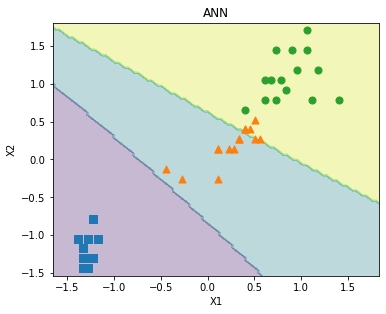

In [45]:
XP = sc.transform(X)
x_min = XP[:, 0].min() - 0.1
x_max = XP[:, 0].max() + 0.1
y_min = XP[:, 1].min() - 0.1
y_max = XP[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
f, ax = plt.subplots(1, 1, figsize=(6,5))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1) # Find the class label
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.3)
markers = ("s", "^", "o", "v", "x")
for idx, lb in enumerate(np.unique(y_test)):
    ax.scatter(X_test_std[y_test==lb, 0], 
                X_test_std[y_test==lb, 1], 
                marker=markers[idx],
                s=50)

ax.set_title('ANN')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.tight_layout(pad=3.0)
plt.show()